# Loading the Dataset
Link to google drive

In [99]:
from google.colab import drive
import numpy as np
import pandas as pd
import sqlite3
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
%ls
%pwd

drive/  sample_data/


'/content'

load the file from the google drive

In [20]:
found_file = False
# Propp's
try:
  with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
    print("found file")
    found_file = True
except FileNotFoundError:
  pass
# Eli
if(not found_file):
  try:
    with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass
# Sabina
if(not found_file):
  try:
    with open('/content/drive/MyDrive/soccer database/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass

if(not found_file):
  print("Failed to find file in google drive")

found file


In [21]:
con = sqlite3.connect('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite')

matches = pd.read_sql_query("SELECT * FROM Match",con)

players = pd.read_sql("SELECT * FROM Player;", con)

teams = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [22]:
players[players["player_api_id"] == matches["away_player_10"][25977]]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
1771,1774,92252,Christian Schneuwly,184285,1988-02-07 00:00:00,177.8,161


In [23]:
binary_class_label = "home_team_win"
binary_class_label_complement = "away_team_win"
matches[binary_class_label] = np.where(matches["home_team_goal"] - matches["away_team_goal"] > 0, 1, 0)
matches[binary_class_label_complement] = np.where(matches["home_team_win"] == 0, 1, 0)

In [24]:
num_home_wins = np.count_nonzero(matches["home_team_win"] == 1)
print(f"Percentage of home wins: {round(num_home_wins / matches.shape[0] * 100, 2)}%")

Percentage of home wins: 45.87%


In [25]:
matches



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win,away_team_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [93]:
odds_features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
odds_data = matches[odds_features + [binary_class_label]].dropna()

odds_data


,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win
997,2.38,3.25,3.00,2.45,3.30,2.70,2.30,3.1,2.60,2.38,...,2.40,3.40,2.90,2.45,3.30,2.70,2.40,3.25,2.70,0
998,1.80,3.60,4.33,1.75,3.70,4.20,1.80,3.2,3.70,1.73,...,1.80,3.60,4.50,1.75,3.70,4.20,1.80,3.50,4.00,1
999,1.65,3.80,5.00,1.67,3.60,5.00,1.65,3.3,4.40,1.67,...,1.70,3.70,5.00,1.67,3.60,5.00,1.70,3.50,4.50,0
1000,1.50,4.00,7.00,1.53,3.90,6.00,1.50,3.7,5.00,1.50,...,1.57,3.90,6.00,1.53,3.90,6.00,1.50,3.80,6.00,1
1001,1.29,5.25,10.00,1.25,5.50,10.00,1.25,4.5,9.00,1.25,...,1.25,5.50,12.00,1.25,5.50,10.00,1.25,5.50,9.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,2.00,3.40,3.75,2.00,3.20,3.90,1.85,3.5,3.95,1.90,...,2.05,3.50,3.90,2.00,3.20,3.90,2.00,3.40,3.50,1
23413,3.00,3.25,2.38,3.30,3.20,2.35,2.90,3.3,2.30,2.88,...,3.20,3.40,2.38,3.30,3.20,2.35,2.88,3.30,2.38,1
23414,8.00,4.50,1.40,8.75,4.75,1.40,7.60,4.8,1.35,8.00,...,9.00,5.25,1.36,8.75,4.75,1.40,8.50,4.50,1.36,0
23415,1.91,3.50,4.00,1.90,3.40,4.00,2.00,3.3,3.60,1.95,...,1.95,3.60,4.20,1.90,3.40,4.00,1.91,3.50,3.75,0


In [94]:
odds_rf = RandomForestClassifier(oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(odds_data[odds_features], odds_data["home_team_win"], test_size=0.2)
X_train

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
12005,2.25,3.10,3.40,2.30,3.10,3.25,2.4,3.1,2.90,2.25,...,3.20,2.30,3.25,3.50,2.30,3.10,3.25,2.25,3.20,3.25
14538,1.67,3.75,5.00,1.62,3.75,4.60,1.6,3.6,4.80,1.62,...,5.00,1.70,4.00,5.00,1.62,3.75,4.60,1.67,3.75,4.75
20735,6.00,4.00,1.55,5.25,3.80,1.55,5.0,3.7,1.55,6.00,...,1.57,6.50,4.30,1.55,5.25,3.80,1.55,6.50,4.00,1.53
12035,1.67,3.80,5.00,1.60,3.80,5.75,1.6,3.5,5.20,1.61,...,6.00,1.60,3.90,6.50,1.60,3.80,5.75,1.57,3.80,6.00
9301,4.20,3.75,1.80,3.90,3.70,1.83,3.7,3.3,1.90,3.75,...,1.73,4.50,3.75,1.85,3.90,3.70,1.83,4.00,3.60,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,3.50,3.50,2.20,3.40,3.50,2.05,3.6,3.3,2.00,3.75,...,2.10,3.60,3.40,2.20,3.40,3.50,2.05,3.60,3.50,2.00
6629,1.57,3.40,7.50,1.57,3.70,6.25,1.5,3.8,5.70,1.53,...,7.00,1.55,4.00,7.50,1.57,3.70,6.25,1.53,3.75,6.50
14564,5.50,4.33,1.53,5.25,3.70,1.57,5.0,3.7,1.55,5.00,...,1.53,5.50,4.30,1.60,5.25,3.70,1.57,5.50,3.80,1.57
11961,2.25,3.10,3.40,2.30,3.10,3.25,2.3,2.9,3.30,2.30,...,3.30,2.30,3.20,3.50,2.30,3.10,3.25,2.30,3.20,3.10


In [95]:
odds_rf.fit(X_train, y_train)
score = odds_rf.score(X_test, y_test)
print(score)

0.6340579710144928


In [96]:
odds_rf.oob_score_

0.6211433756805808

In [97]:
y_pred = odds_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6340579710144928


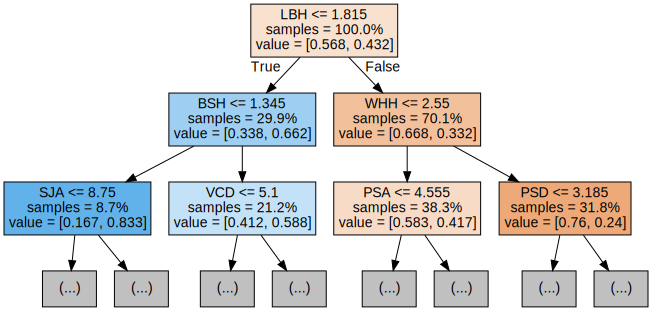

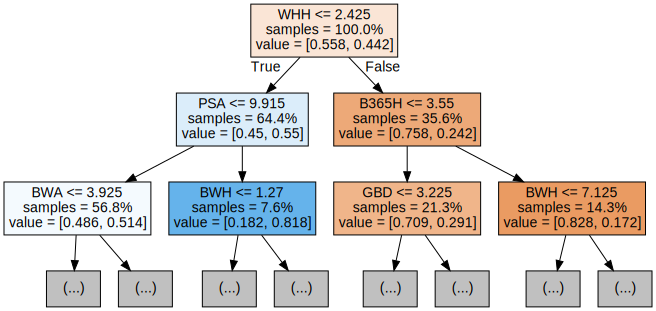

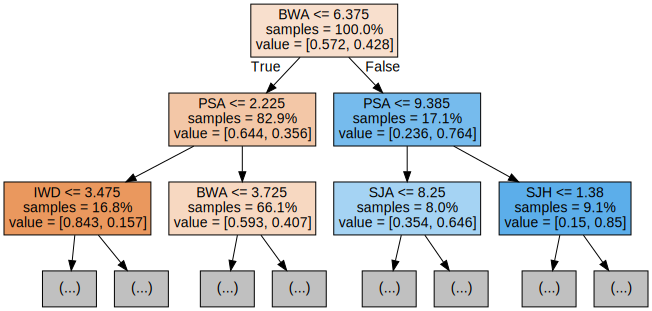

In [98]:
for i in range(3):
    tree = odds_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [101]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 245}


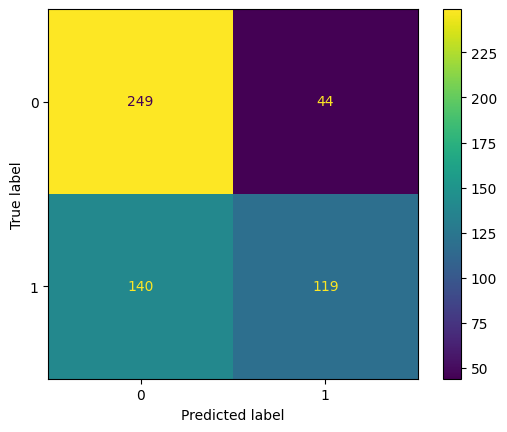

In [102]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [107]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6666666666666666
Precision: 0.7300613496932515
Recall: 0.4594594594594595


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

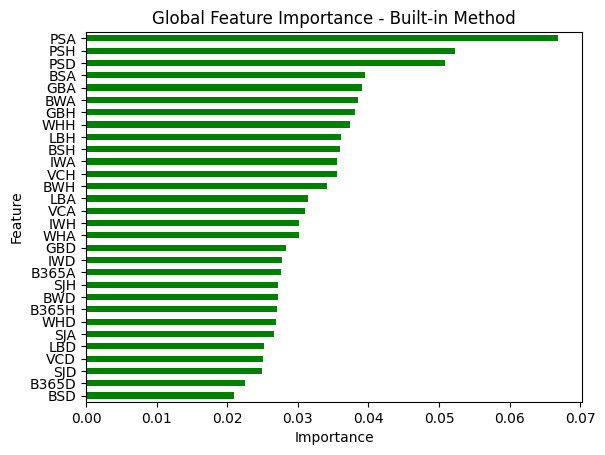

In [105]:
global_importances = pd.Series(odds_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

<Axes: >

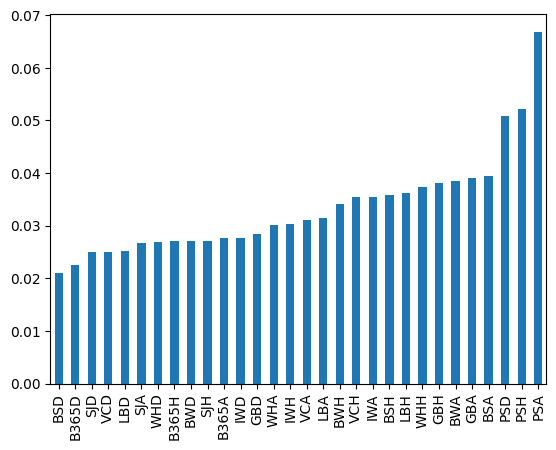

In [106]:
global_importances.plot.bar()

In [34]:
top_k = len(odds_features) # the number of top features to select

train_error = []
test_error = []
num_features = list(range(1, top_k))
for k in num_features:
    top_k_features = list(global_importances.head(k)["feature_name"])
    top_k_odds_rf = RandomForestClassifier(odds_data[top_k_features + [binary_class_label]], top_k_features, suppress_print=True)
    tr_err, te_err = train_test_error(top_k_odds_lr, top_k_features, suppress_print=True)
    train_error.append(tr_err)
    test_error.append(te_err)

plot_errors(train_error, test_error, num_features)

NameError: ignored

In [76]:
most_important = ["PSD", "PSH", "PSA", "WHH"]
better_odds_data = matches[most_important + [binary_class_label]].dropna()
better_odds_rf = RandomForestClassifier(oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(better_odds_data[most_important], better_odds_data["home_team_win"], test_size=0.2)
better_odds_rf.fit(X_train, y_train)
score = better_odds_rf.score(X_test, y_test)
print(score)
y_pred = better_odds_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

0.6265114196148679
Accuracy: 0.6265114196148679


In [56]:
goal_rf = RandomForestClassifier(oob_score=True)
home_goal = ["home_team_goal", "away_team_goal"]

goal_data = matches[home_goal].dropna()
X_train, X_test, y_train, y_test = train_test_split(goal_data, matches["home_team_win"], test_size=0.2)

In [57]:
goal_rf.fit(X_train, y_train)
goal_rf.oob_score_
y_pred = goal_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [46]:
rand_rf = RandomForestClassifier(oob_score=True)
feat = ['shoton', 'shotoff', 'goal', 'foulcommit', 'card', 'cross', 'corner', 'possession']
rand_data = matches[feat + [binary_class_label]].dropna()

X_train, X_test, y_train, y_test = train_test_split(rand_data[feat], rand_data[binary_class_label], test_size=0.2)
rand_data

,shoton,shotoff,goal,foulcommit,card,cross,corner,possession,home_team_win
1728,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,0
1729,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1
1730,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,0
1731,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1
1732,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,1
...,...,...,...,...,...,...,...,...,...
25944,<shoton />,<shotoff />,<goal><value><comment>o</comment><stats><owngo...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0
25945,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1
25946,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0
25947,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0


In [48]:
#rand_rf.fit(X_train, y_train)
#rand_rf.oob_score_

FIFA Attributes

In [45]:
team_attributes = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [47]:
buildup_features = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing"]
chance_creation_features = ["chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting"]
defence_features = ["defencePressure", "defenceAggression", "defenceTeamWidth"]
categories = [buildup_features, chance_creation_features, defence_features]

aggregations = ["mean", "min", "max", "median"]

all_attr_features = []
for category in categories:
    all_attr_features += category

all_attr_features_agg = []
categories_agg = []
for category in categories:
    category_agg = []
    for agg in aggregations:
        for feature in category:
            formatted_feature_name = f"{feature}_{agg}"
            category_agg.append(formatted_feature_name)
            all_attr_features_agg.append(formatted_feature_name)
    categories_agg.append(category_agg)

len(all_attr_features_agg)

36

In [48]:
aggregated_attributes = team_attributes.groupby("team_api_id").agg(
    {feature : [(f"{feature}_{agg}", agg) for agg in aggregations]for feature in all_attr_features}
).reset_index(col_level = 1).droplevel(level = 0, axis = 1)[["team_api_id"] + all_attr_features_agg]

aggregated_attributes.head()

,team_api_id,buildUpPlaySpeed_mean,buildUpPlayDribbling_mean,buildUpPlayPassing_mean,buildUpPlaySpeed_min,buildUpPlayDribbling_min,buildUpPlayPassing_min,buildUpPlaySpeed_max,buildUpPlayDribbling_max,buildUpPlayPassing_max,...,defenceTeamWidth_mean,defencePressure_min,defenceAggression_min,defenceTeamWidth_min,defencePressure_max,defenceAggression_max,defenceTeamWidth_max,defencePressure_median,defenceAggression_median,defenceTeamWidth_median
0,1601,47.333333,48.0,46.166667,30,48.0,38,53,48.0,55,...,49.333333,43,44,49,65,60,50,43.0,44.0,49.0
1,1773,52.000000,51.0,50.000000,52,51.0,50,52,51.0,50,...,50.000000,43,44,50,43,44,50,43.0,44.0,50.0
2,1957,47.166667,54.0,52.666667,30,54.0,38,66,54.0,69,...,53.666667,32,50,49,70,70,70,48.5,56.0,51.0
3,2033,49.000000,62.0,48.400000,45,62.0,40,65,62.0,55,...,45.400000,37,24,35,50,45,60,37.0,31.0,44.0
4,2182,60.333333,52.5,49.000000,40,50.0,35,67,55.0,57,...,54.500000,47,37,45,60,58,63,48.5,47.0,55.5


In [49]:
def attribute_matchup(dataset, home_id, away_id):
    """
    Computes the matchup features for the home_id and away_id.
    """
    home = dataset[dataset["team_api_id"] == home_id][all_attr_features_agg].to_numpy()
    away = dataset[dataset["team_api_id"] == away_id][all_attr_features_agg].to_numpy()
    if len(home) == 0 or len(away) == 0:
        # Team not present, no matchup possible
        return pd.Series([np.nan] * len(all_attr_features_agg), index = all_attr_features_agg)
    diff = (home - away)[0]
    return pd.Series(diff, index = all_attr_features_agg)

In [50]:
attr_data = matches.copy()
attr_data[all_attr_features_agg] = attr_data.apply(lambda x: attribute_matchup(aggregated_attributes, x["home_team_api_id"], x["away_team_api_id"]), axis = 1, result_type = "expand")

In [51]:
attr_data = attr_data.dropna()

In [81]:
attr_rf = RandomForestClassifier(oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(attr_data[all_attr_features_agg], attr_data["home_team_win"], test_size=0.2)
attr_rf.fit(X_train, y_train)
score = attr_rf.score(X_test, y_test)
print(score)
path = attr_rf.decision_path(X_train)
print(path)
y_pred = attr_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

0.5977337110481586
(<1409x46056 sparse matrix of type '<class 'numpy.int64'>'
	with 1708428 stored elements in Compressed Sparse Row format>, array([    0,   447,   886,  1357,  1808,  2245,  2722,  3163,  3630,
        4119,  4596,  5065,  5534,  5991,  6418,  6885,  7358,  7825,
        8308,  8761,  9244,  9691, 10108, 10577, 11036, 11509, 11970,
       12405, 12876, 13349, 13806, 14275, 14758, 15231, 15704, 16191,
       16656, 17125, 17592, 18055, 18534, 18999, 19468, 19909, 20366,
       20835, 21288, 21759, 22202, 22653, 23122, 23587, 24036, 24497,
       24954, 25415, 25874, 26327, 26788, 27187, 27638, 28113, 28580,
       29029, 29490, 29943, 30414, 30855, 31318, 31761, 32250, 32693,
       33158, 33617, 34070, 34505, 34956, 35385, 35854, 36319, 36754,
       37225, 37682, 38165, 38620, 39111, 39588, 40045, 40522, 40989,
       41440, 41909, 42366, 42821, 43296, 43757, 44208, 44647, 45116,
       45581, 46056]))
Accuracy: 0.5977337110481586


Text(0.5, 1.0, 'Global Feature Importance')

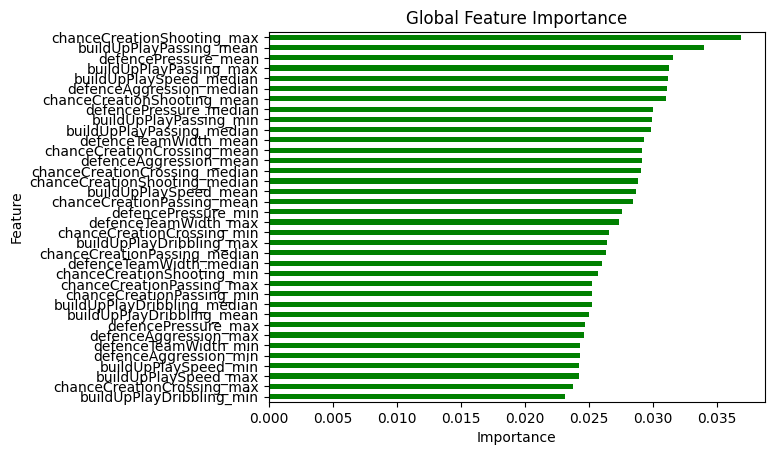

In [56]:
global_importances = pd.Series(attr_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

In [62]:
attr_data

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,defenceTeamWidth_mean,defencePressure_min,defenceAggression_min,defenceTeamWidth_min,defencePressure_max,defenceAggression_max,defenceTeamWidth_max,defencePressure_median,defenceAggression_median,defenceTeamWidth_median
3248,3249,1729,1729,2012/2013,1,2012-08-18 00:00:00,1228229,9825,8472,0,...,-1.333333,-5.0,2.0,10.0,17.0,-13.0,-13.0,5.0,-8.5,1.0
3249,3250,1729,1729,2012/2013,1,2012-08-20 00:00:00,1228230,8668,10260,1,...,1.500000,0.0,3.0,0.0,1.0,17.0,-5.0,7.5,8.5,3.5
3250,3251,1729,1729,2012/2013,1,2012-08-18 00:00:00,1228231,9879,9850,5,...,-4.666667,-5.0,-11.0,-3.0,-15.0,-31.0,-8.0,-1.5,-11.5,-6.0
3251,3252,1729,1729,2012/2013,1,2012-08-19 00:00:00,1228232,8456,8466,3,...,2.833333,-1.0,1.0,1.0,-5.0,-5.0,-16.0,-7.0,-12.5,10.0
3252,3253,1729,1729,2012/2013,1,2012-08-18 00:00:00,1228233,10261,8586,2,...,-6.666667,11.0,-1.0,-8.0,-7.0,4.0,-9.0,-9.0,-4.0,-5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,23413,21518,21518,2012/2013,9,2012-10-28 00:00:00,1260116,8581,7878,3,...,-13.466667,-18.0,-12.0,-20.0,-7.0,3.0,-12.0,-7.0,4.5,-12.0
23413,23414,21518,21518,2012/2013,9,2012-10-28 00:00:00,1260118,8394,8302,2,...,-4.500000,0.0,-18.0,-10.0,-9.0,-24.0,-7.0,9.5,-4.5,0.0
23414,23415,21518,21518,2012/2013,9,2012-10-28 00:00:00,1260121,8661,8633,0,...,-9.500000,6.0,0.0,-10.0,-9.0,-12.0,-12.0,8.5,-11.0,-9.0
23415,23416,21518,21518,2012/2013,9,2012-10-27 00:00:00,1260123,9910,9783,1,...,1.166667,0.0,-5.0,2.0,10.0,5.0,-1.0,-3.0,2.0,3.0


In [88]:
buildup_rf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(attr_data[categories_agg[1]], attr_data["home_team_win"], test_size=0.2)
buildup_rf.fit(X_train, y_train)
score = buildup_rf.score(X_test, y_test)
print(score)

0.009316564654339166
